In [8]:
from hw import calibration
from fox_toolbox.utils import xml_parser

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read IRSM FORM

In [9]:
form = 'input_5swo.xml'
out = 'output_5swo.xml'

processes = xml_parser.parse_processes(form)
proc = processes[0]

dsc_curve, (estim_curve, *sprds) = proc.main_curve, *proc.sprd_curves
cal_basket = proc.cal_basket
mr = proc.factors.meanR

## HW Calibration

In [10]:
calibrationJ = calibration.calibrate_sigma_hw(cal_basket, mr, dsc_curve, estim_curve, IsJamsh=True)

Starting calibration on 4 swaptions with vol type: N
Calibration SUCCESSFUL


In [22]:
calibrationH = calibration.calibrate_sigma_hw(cal_basket, mr, dsc_curve, estim_curve, IsJamsh=False)

Starting calibration on 4 swaptions with vol type: N
Calibration SUCCESSFUL


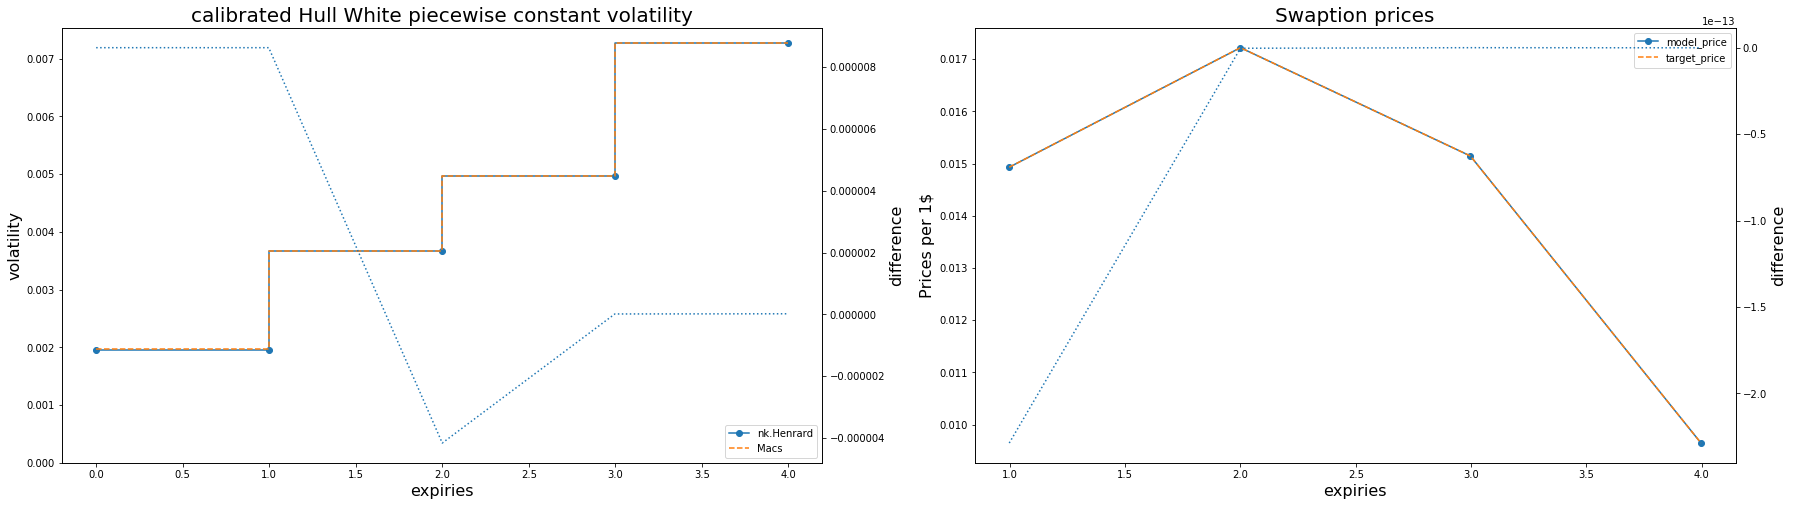

In [23]:
calibrationH.plot(out)

In [24]:
sigma = calibrationH.sigma
calibrationH.sigma.buckets

array([ 0.,  1.,  2.,  3.,  4., 34.])

In [25]:
for i in calibrationH.sigma.values:
    print(i)

0.0019542725816797855
0.0019542725816797855
0.0036633186753822554
0.004964630414935874
0.007264168142665606
0.007264168142665606


In [26]:
sigma(2)

array(0.)

In [37]:
sigma(0.999) * 10000

36.63318675382256

In [42]:
from scipy.interpolate import interp1d
import numpy as np

In [54]:
nik = interp1d(np.array([1.,10.]), np.array([1.,23.]), kind='previous')

In [55]:
t = 5.
time = np.asarray(t)
nik(time)

array(1.)